Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [4]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

In [6]:
X_r.shape

(150, 2)

In [7]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X, y)

In [8]:
# Percentage of variance explained for each components
print('Explained variance ratio (first two components): {}'.format(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

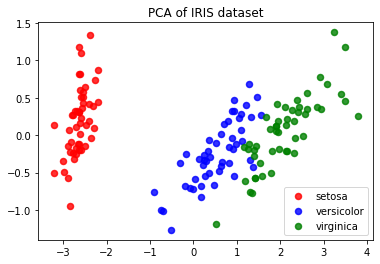

In [9]:
colors = ['red', 'blue', 'green']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=1.5, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

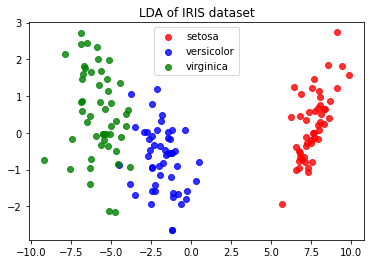

In [10]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

### Manifold Learning

In [11]:
from mpl_toolkits import mplot3d
from sklearn import manifold

In [12]:
X, t = datasets.make_swiss_roll(n_samples=1500)

In [13]:
X.shape

(1500, 3)

In [14]:
t.shape

(1500,)

In [15]:
t

array([ 8.88279987,  8.86840593,  8.7573253 , ...,  9.6220888 ,
       13.41471844, 11.05671743])

Text(0.5, 0.92, 'Original data')

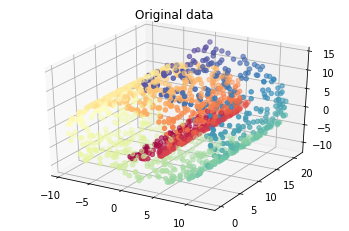

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.Spectral)
ax.set_title("Original data")

### Multidimensional Scaling (MDS)

In [16]:
mds = manifold.MDS(n_components=2, max_iter=100)

In [17]:
Y = mds.fit_transform(X)

Text(0.5, 1.0, 'MDS')

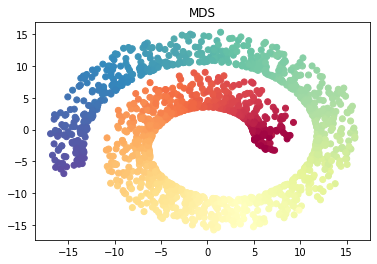

In [18]:

plt.scatter(Y[:, 0], Y[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('MDS')

### Isomap

In [19]:
im = manifold.Isomap(n_neighbors=12, n_components=2)

In [20]:
Y = im.fit_transform(X)

Text(0.5, 1.0, 'Isomap')

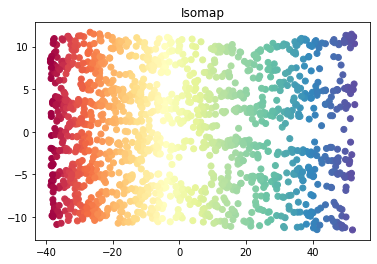

In [21]:

plt.scatter(Y[:, 0], Y[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('Isomap')

### Locally Linear Embedding (LLE)

In [22]:
lle = manifold.LocallyLinearEmbedding(n_neighbors=12, n_components=2)

In [23]:
Y = lle.fit_transform(X)

Text(0.5, 1.0, 'LLE')

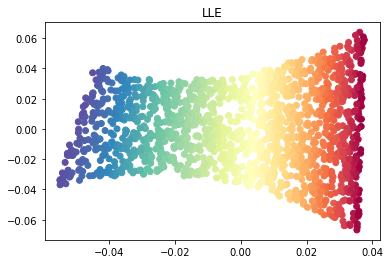

In [24]:
plt.scatter(Y[:, 0], Y[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('LLE')